In [4]:

%pip install requests
%pip install pandas
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


status
legitimate    5715
phishing      5715
Name: count, dtype: int64
http://www.crestonwood.com/router.php
Respuesta del servidor: {'suspicious_url_pattern': False, 'google_safe_browsing': {}, 'virus_total': {'data': {'type': 'analysis', 'id': 'u-776e6b8069b6a4608a1cd33af977d3412ee4a0c3c00604966422aef7e9e642c8-1743770757', 'links': {'self': 'https://www.virustotal.com/api/v3/analyses/u-776e6b8069b6a4608a1cd33af977d3412ee4a0c3c00604966422aef7e9e642c8-1743770757'}}}}
URL: https://www.rga.com/about/workplace - Predicción: Legitimate - Real: Legitimate
Respuesta del servidor: {'suspicious_url_pattern': False, 'google_safe_browsing': {}, 'virus_total': {'data': {'type': 'analysis', 'id': 'u-99ab67298d946549c394a5e9ef2e9d3191d34bafe7dca616bb194cde41eb731e-1743770757', 'links': {'self': 'https://www.virustotal.com/api/v3/analyses/u-99ab67298d946549c394a5e9ef2e9d3191d34bafe7dca616bb194cde41eb731e-1743770757'}}}}
URL: http://starasia.com.hk - Predicción: Legitimate - Real: Legitimate
Respuest

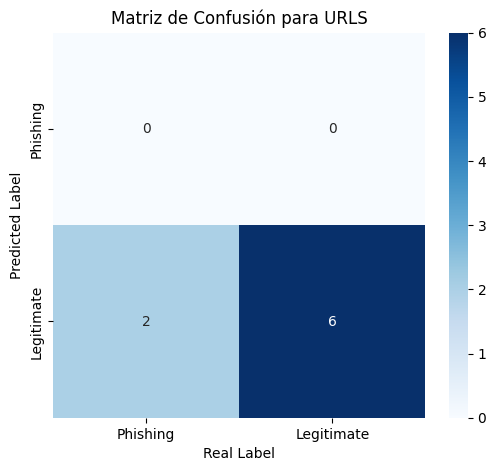

In [33]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import time  # Importar para hacer las pausas entre las solicitudes
# Inicializar los contadores de la matriz de confusión manual
tp, fp, tn, fn = 0, 0, 0, 0
# Cargar el archivo CSV
df = pd.read_csv("dataset_phishing.csv")

# Ver distribución de clases
print(df["status"].value_counts())

# Mostrar la primera URL disponible
print(df["url"].iloc[0])

# Seleccionar 10 URLs aleatorias del dataset
df_sample = df.sample(n=8, random_state=42)

# Obtener etiquetas reales (0 = legitimate, 1 = phishing)
true_labels = df_sample["status"].apply(lambda x: 1 if x.lower() == "phishing" else 0).tolist()

predicted_labels = []
batch_size = 8  # Mostrar log cada 50 URLs

# URL del endpoint donde se realiza el análisis
endpoint_url = "http://localhost:8080/api/phishing/analyze"  # Cambiar si el servidor está en otro puerto o dirección


# Variable para contar las peticiones realizadas
requests_made = 0

# Evaluar el modelo en cada URL
for i, url in enumerate(df_sample["url"]):
    # Realizar solicitud POST al endpoint para analizar la URL
    response = requests.post(endpoint_url, json={"url": url})

    if response.status_code == 200:
        # Extraer la respuesta JSON
        result = response.json()
        print(f"Respuesta del servidor: {result}")
        # Ver si el patrón de la URL es sospechoso
        is_suspicious = result.get("suspicious_url_pattern", False)
        predicted_label = "Phishing" if is_suspicious else "Legitimate"
        
        # Convertir la predicción a 0 o 1 (Phishing = 1, Legitimate = 0)
        predicted_numeric = 1 if predicted_label == "Phishing" else 0
        true_numeric = true_labels[i]

        print(f"URL: {url} - Predicción: {predicted_label} - Real: {'Phishing' if true_numeric == 1 else 'Legitimate'}")

        # Contar los valores de TP, FP, TN, FN manualmente
        if predicted_numeric == 1 and true_numeric == 1:
            tp += 1  # True Positive
        elif predicted_numeric == 1 and true_numeric == 0:
            fp += 1  # False Positive
        elif predicted_numeric == 0 and true_numeric == 0:
            tn += 1  # True Negative
        elif predicted_numeric == 0 and true_numeric == 1:
            fn += 1  # False Negative

        predicted_labels.append(predicted_label)

        # Contar las peticiones realizadas
        requests_made += 1

        # Si ya se han hecho 4 peticiones, esperar 60 segundos antes de continuar
        if requests_made == 4:
            print("Límite de 4 peticiones alcanzado, esperando 1 minuto...")
            time.sleep(1)  # Pausar el script durante 60 segundos
            requests_made = 0  # Reiniciar el contador de peticiones

        # Mostrar logs cada 50 URLs
        if (i + 1) % batch_size == 0 or (i + 1) == len(df_sample):
            print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")
            print("-" * 50) # Separador para claridad   

# Calcular precisión final usando las etiquetas numéricas (0 y 1)
accuracy = accuracy_score(true_labels, [1 if label == "Phishing" else 0 for label in predicted_labels])
print(f"\nPrecisión final en el dataset de 10,000 urls: {accuracy:.4f}")
# Imprimir los valores de la matriz de confusión
print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")

# Construir la matriz de confusión correcta
conf_matrix = [[tp, fp], [fn, tn]] 

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])

# Agregar títulos y etiquetas
plt.title("Matriz de Confusión para URLS")
plt.xlabel("Real Label")  # Valores reales en el eje X
plt.ylabel("Predicted Label")  # Predicciones en el eje Y

# Mostrar la gráfica
plt.show()


Precisión final: 0.6000
TP: 0 | FP: 0 | TN: 30 | FN: 20


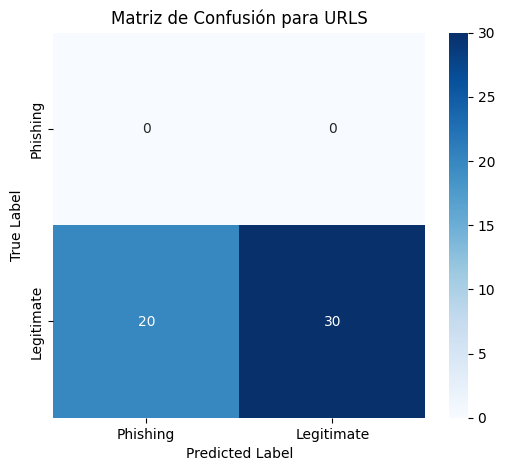

In [31]:
# Calcular precisión final
accuracy = accuracy_score(true_labels, [1 if label == "Phishing" else 0 for label in predicted_labels])
print(f"\nPrecisión final: {accuracy:.4f}")
print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")

# Crear la matriz de confusión manualmente
conf_matrix = [[tp, fp], [fn, tn]]

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])

# Agregar títulos y etiquetas
plt.title("Matriz de Confusión para URLS")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Mostrar la gráfica
plt.show()
